# 트레이딩을 위한 기술적 지표

## TA-Lib 패키지 설치하기

In [2]:
import yfinance as yf

stock_data = yf.download('^GSPC')
stock_data = stock_data.tail(500)

[*********************100%%**********************]  1 of 1 completed


C:\Users\woojin\AppData\Local\Temp\ipykernel_23040\2110995755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'],
C:\Users\woojin\AppData\Local\Temp\ipykernel_23040\2110995755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_60'] = talib.SMA(stock_data['Close'],


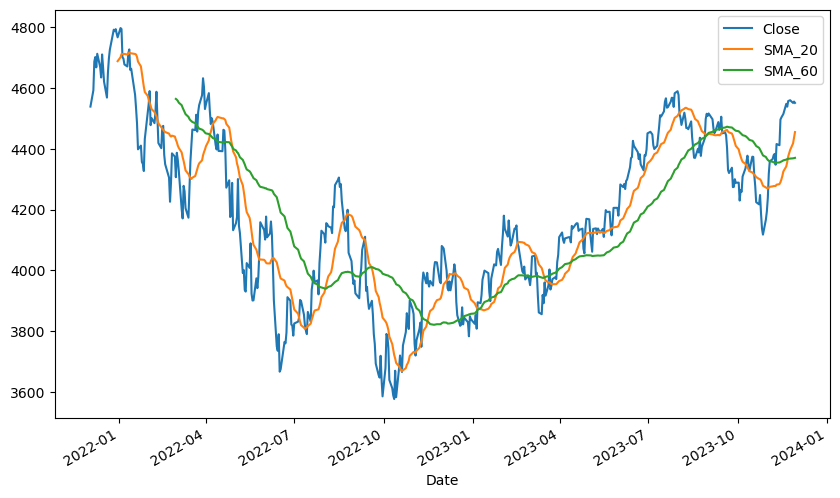

In [3]:
# simple moving average
import talib
import matplotlib.pyplot as plt 

stock_data['SMA_20'] = talib.SMA(stock_data['Close'],
                                 timeperiod=20)     # 20 days SMA
stock_data['SMA_60'] = talib.SMA(stock_data['Close'],
                                 timeperiod=60)     # 60 days SMA 
stock_data[['Close', 'SMA_20', 'SMA_60']].plot(figsize=(10, 6))
plt.show()

C:\Users\woojin\AppData\Local\Temp\ipykernel_23040\3683881770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA_60'] = talib.EMA(stock_data['Close'], 60)   # 60일 지수 이동평균


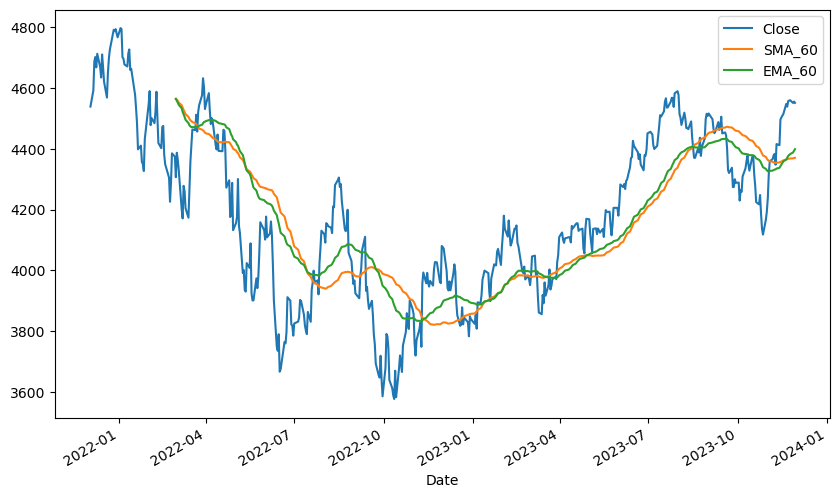

In [4]:
# exponential moving average
stock_data['EMA_60'] = talib.EMA(stock_data['Close'], 60)   # 60일 지수 이동평균
stock_data[['Close', 'SMA_60', 'EMA_60']].plot(figsize=(10, 6))
plt.show()


## 상대강도지수

C:\Users\woojin\AppData\Local\Temp\ipykernel_23040\3259152495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)
C:\Users\woojin\AppData\Local\Temp\ipykernel_23040\3259152495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI_14'].fillna(0, inplace=True)
C:\Users\woojin\AppData\Local\Temp\ipykernel_23040\3259152495.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove

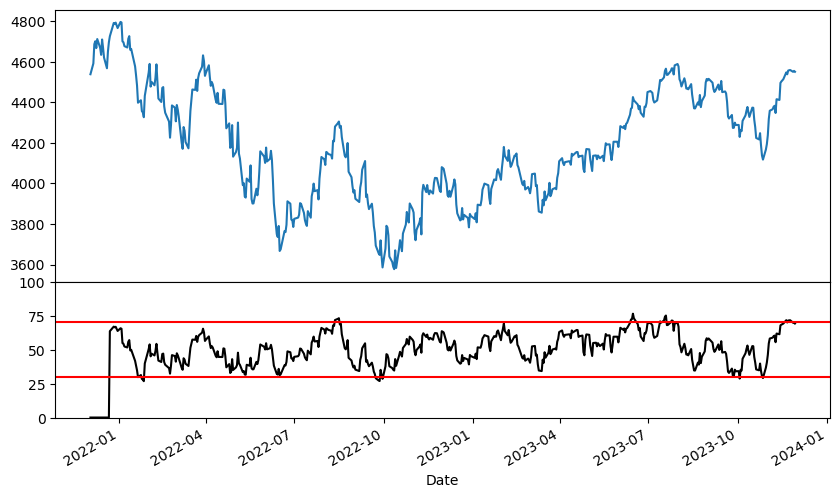

In [7]:
# S&P 500 지수의 RSI

from matplotlib import gridspec

stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)
stock_data['RSI_14'].fillna(0, inplace=True)
fig = plt.subplots(figsize=(10, 6), sharex=True)
# GrisSpec() 함수를 통해 그림을 두 구간으로 나누어 준다.
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

# 주가 나타내기
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

# RSI 나타내기
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0, 100])
ax2.axhline(y=70, color='r', linestyle='-')
ax2.axhline(y=30, color='r', linestyle='-')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

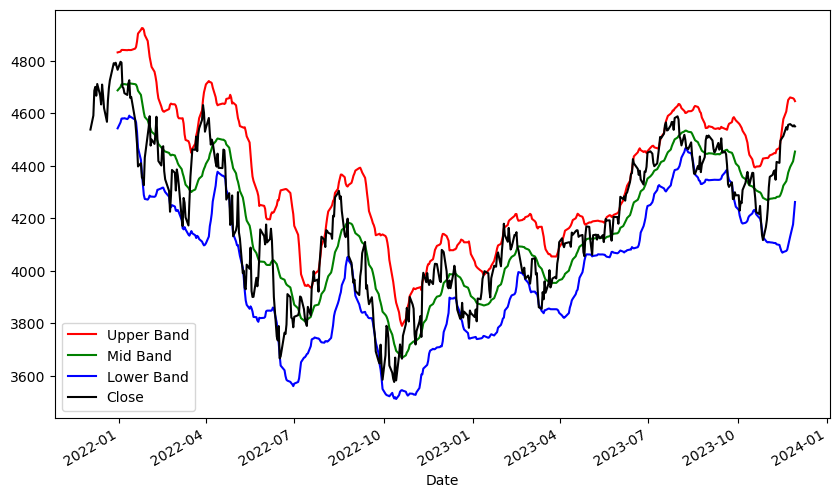

In [8]:
# S&P 500 볼린저밴드
import pandas as pd

upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(
    stock_data['Close'],
    nbdevup=2,
    nbdevdn=2,
    timeperiod=20
)

bb = pd.concat([upper_2sd, mid_2sd, lower_2sd, stock_data['Close']], axis=1)
bb.columns = ['Upper Band', 'Mid Band', 'Lower Band', 'Close']
bb.plot(figsize=(10, 6),
        color={
            'Upper Band': 'red',
            'Lower Band': 'blue',
            'Mid Band': 'green',
            'Close': 'black'
        })
plt.show()